# Разновидности метрик моделей машинного обучения в задачах классификации
<a id="top"></a>

***Основано на статье "[Основные метрики задач классификации в машинном обучении](https://webiomed.ai/blog/osnovnye-metriki-zadach-klassifikatsii-v-mashinnom-obuchenii/)" (08.07.2020)***

### ***Содержание***

* 1. [Введение](#intro)
* 2. [Метрики бинарной классификации](#bin_class)
    * 2.1. [Accuracy](#acc)
    * 2.2. [Precision](#prec)
    * 2.3. [Recall (true positive rate)](#rec)
    * 2.4. [F1-Score (F1)](#f1)
    * 2.5. [ROC (receiver operating characteristic)](#roc)
    * 2.6. [AUC (Area Under Curve)](#auc)
* 3. [Мульти-классификация](#mul_class)
* 4. [Заключение](#end)

## **1. Введение**
<a id='intro'></a>
[**Вернуться к содержанию**](#top)

В каждой задаче машинного обучения ставится вопрос оценки результатов моделей.

Без введенных критериев, невозможно будет ни оценить “успешность” модели, ни сравнить между собой два различных алгоритма. Именно поэтому важно учесть правильный выбор метрик для поставленной задачи, хотя множество существующих метрик может запутать и, в конечном счете, привести к неоптимальному решению.

## **2. Метрики бинарной классификации**
<a id='bin_class'></a>
[**Вернуться к содержанию**](#top)

В задачах бинарной классификации данные поделены на два класса: их метки принято обозначать как "$+$" и "$-$". Рассматриваемые ниже метрики основаны на использовании следующих исходов:

* истинно положительные **(TP)**;
* истинно отрицательные **(TN)**;
* ложно положительные **(FP)**;
* ложно отрицательные **(FN)**.

Для наглядности, исходы можно преобразовать в таблицу сопряженности (*Рис. 1*). Ложно положительный и истинно отрицательный исход ещё называют ошибками первого и второго рода соответственно.

***Рис. 1: Таблица сопряжённости исходов бинарной классификации***

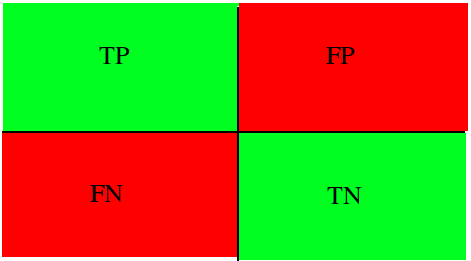

На *Рис. 1* зелёным цветом отмечены квадранты **TP** и **TN** -- истинно положительный и истинно отрицательный исходы соответственно (когда модель **правильно** предсказала принадлежность к одному из двух классов). Таким образом, красные квадранты -- **FP** и **FN** -- ложно положительный и ложно отрицательный соответственно (когда модель **неправильно** предсказала принадлежность к одному из двух классов).

### 2.1. Accuracy
<a id='acc'></a>

Одной из наиболее простых, а поэтому и распространенной метрикой является точность (англ. "Accuracy"). Она показывает **количество правильно проставленных меток класса** (истинно положительных (TP) и истинно отрицательных (TN)) **от общего количества данных** и считается следующим образом:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

Однако, эта простота является также и причиной, почему её часто критикуют и почему она может абсолютно не подойти под решаемую задачу. Она **не учитывает соотношения ложных срабатываний модели**, что может быть критическим, особенно в медицинской сфере, когда стоит задача распознать все истинные случаи диагноза.

Рассмотрим пример с подозрением на заболевание. Модели требуется поставить диагноз. Если наша точность равна $80\%$, то можно сказать, что в среднем **из $100$ человек она правильно определит наличие или отсутствие диагноза лишь у $80$ человек**, тогда как ещё $20$ будут либо ложно отрицательными, либо ложно положительными.

Стоит обратить внимание на то, что в некоторых задачах необходимо определить всех пациентов с диагнозом и можно даже пренебречь ложно положительными исходами, так как они могут отсеяться на следующих стадиях исследования (например, после контрольной сдачи анализов), тогда необходимо добавить к этой метрике ещё одну, которая могла бы оценить требуемый приоритет.

### 2.2. Precision
<a id='prec'></a>

Несмотря на различные английские названия и разные формулы подсчета, русский перевод этой метрики также закрепился как «точность», что может вызвать недоумение и конфуз, поэтому следует уточнять, о чем именно вы говорите. Эта точность показывает **количество истинно положительных исходов из всего набора положительных меток** и считается по следующей формуле:

$Precision = \frac{TP}{TP\space +\space FP}$

Важность этой метрики определяется тем, **насколько высока для рассматриваемой задачи «цена» ложно положительного результата**. Если, например, стоимость дальнейшей проверки наличия заболевания у пациента высока и мы просто не можем проверить все ложно положительные результаты, то стоит максимизировать данную метрику, ведь при $Precision = 50\%\space$ из $100$ положительно определенных больных  диагноз будут иметь лишь $50$ из них.

### 2.3. Recall (true positive rate)
<a id="rec"></a>

В русском языке для этого термина используется слово «полнота» или «чувствительность». Эта метрика определяет **количество истинно положительных среди всех меток класса, которые были определены как «положительный»** и вычисляется по следующей формуле:

$Recall = \frac{TP}{TP\space +\space FN}$

Необходимо уделить особое внимание этой оценке, когда в поставленной задаче ошибка нераспознания положительного класса высока, например, при выставлении диагноза какой-либо смертельной болезни.

### 2.4. F1-Score (F1)
<a id="f1"></a>

В том случае, если $Precision$ и $Recall$ являются одинаково значимыми, можно использовать их среднее гармоническое для получения оценки результатов:

$H(x_1, x_2, \ldots, x_{n-1}, x_n) = \frac{n}{\frac{1}{x_1} + \frac{1}{x_2} + \frac{1}{x_{n-1}} + \frac{1}{x_n}} = \frac{n}{\sum\limits_{i=1}\limits^{n} \frac{1}{x_i}} = \frac{n\sum\limits_{i=1}\limits^{n} x_i}{(\sum\limits_{i=1}\limits^{n} \frac{1}{x_i})(\sum\limits_{i=1}\limits^{n} x_i)} = \frac{n\prod\limits_{i=1}\limits^{n} x_i}{\sum\limits_{i=1}\limits^{n} x_i} \Longrightarrow F1 = H(Precision, Recall) = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} = \frac{2 \space\cdot\space Precision \space\cdot\space Recall}{Precision \space+\space Recall}$

Помимо точечных оценок, существует целый ряд графических методов, способных оценить качество классификации.Помимо точечных оценок, существует целый ряд графических методов, способных оценить качество классификации.

### 2.5. ROC (receiver operating characteristic)
<a id="roc"></a>

Данная метрика представляет из себя график, показывающий **зависимость верно классифицируемых объектов положительного класса от ложно положительно классифицируемых объектов негативного класса**. Иными словами, **соотношение True Positive Rate (Recall) и False Positive Rate** (*Рис. 2*). При этом, False Positive Rate ($FPR$) рассчитывается по следующей формуле:

***Рис. 2: ROC (receiver operating characteristic)***

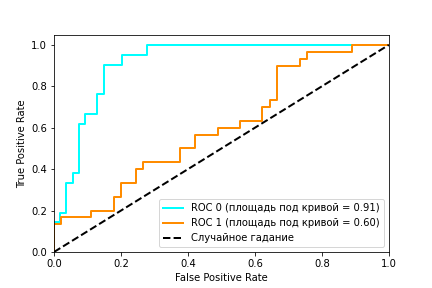

*Рис. 2* содержит пример двух $ROC$–кривых. Идеальное значение графика находится в верхней левой точке ($TPR = 1$, a $FPR = 0$\space). При этом, кривая, соответствующая $FPR = TPR\space$ является **случайным гаданием**, а если график кривой модели или точка находятся ниже этого минимума, то это говорит лишь о том, что лучше подбрасывать монетку, чем использовать эту модель. При этом говорят, что кривая $X$ доминирует над другой кривой $Y$, если $X$ в любом точке находится левее и выше $Y$, что означает **превосходство** первого классификатора над вторым.

С помощью $ROC$-кривой, можно сравнить модели, а также их параметры для поиска наиболее оптимальной (с точки зрения $TPR$ и $FPR$) комбинации. В этом случае ищется **компромисс между количеством больных, метка которых была правильно определена как положительная и количеством больных, метка которых была неправильно определена как положительная**.

### 2.6. AUC (Area Under Curve)
<a id="auc"></a>

В качестве **численной оценки** $ROC$-кривой принято брать **площадь под** этой **кривой**, которая является неплохим «итогом» для кривой. Если между кривыми $X$ и $Y$ существует доминирование первой над второй, то $AUC(X) > AUC(Y),$ обратное не всегда верно. Но $AUC$ обладает так же и статистическим смыслом: она показывает вероятность того, что случайно выбранный экземпляр негативного класса будет иметь **меньше вероятность быть распознанным как позитивный класс**, чем случайно выбранный позитивный класс.

$AUC$ часто сравнивают с метрикой $Accuracy$, и у первой есть явное преимущество при исследовании некоторых моделей - она может работать с **вероятностями**. Например, рассмотрим следующий пример (*Рис. 3*): пусть две модели классифицируют $10$ тестовых экземпляров. $5$ они классифицируют как положительный класс и столько же как отрицательный, так же экземпляры упорядочены в соответствии с вероятностью принадлежать положительному классу (слева—направо). Оба классификатора имеют одинаковую точность — $80\%$, но $AUC$ у первого — $0.96$, а у второго — $0.64$, поскольку вероятности ошибочных экземпляров разная. Но так же можно найти и контрпример, когда $AUC$ одинаковый, а точность разная.

***Рис. 3: Два классификатора имеют одинаковую точность, но разный AUC***

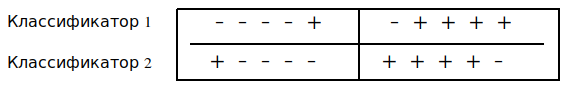

## Мульти-классификация
<a id="mul_class"></a>
[**Вернуться к содержанию**](#top)

Все рассмотренные выше метрики относились лишь к **бинарной задаче**, но, зачастую, классов больше, чем два. Это обуславливает необходимость в обобщении рассмотренных метрик. Одним из возможных способов является вычисление **среднего метрики по всем классам**. Тогда в качестве «положительного» класса берется вычисляемый, а все остальные — в качестве «отрицательного».

В этом случае формулы для метрик будут выглядеть следующим образом:

$\overline{Accuracy} = \frac{\sum\limits_{i=1}\limits^{k} Accuracy_i}{k}$

$\overline{Precision} = \frac{\sum\limits_{i=1}\limits^{k} Precision_i}{k}$

$\overline{Recall} = \frac{\sum\limits_{i=1}\limits^{k} Recall_i}{k}$

$\overline{Precision} = \frac{\sum\limits_{i=1}\limits^{k} Precision_i}{k}$

$\overline{F1} = \frac{\sum\limits_{i=1}\limits^{k} F1_i}{k},$ где $k$ - количество классов;

И $AUC_{Total} = f(c_i)\sum\limits_{i=1}\limits^{k} AUC(c_i),$ где $f(c)$ - относительная частота класса $c$.

## 4. Заключение
<a id="end"></a>
[**Вернуться к содержанию**](#top)

Рассмотренные метрики являются лишь основными и лишь для задач классификации. Существует ещё множество различных областей, в которых они будут разными, потому что каждая задача имеют свою специфику и приоритеты. Невозможно дать каких-то четких гарантий и уж тем более определить, какая из метрик лучше. Выбирать и отдавать предпочтение стоит лишь исходя из своего личного опыта и других исследований.